In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [52]:
data=pd.read_csv("kmeans_clustering_dataset.csv")

In [53]:
data.head()

,Feature1,Feature2
0,1.248357,0.930868
1,1.323844,1.761515
2,0.882923,0.882932
3,1.789606,1.383717
4,0.765263,1.271280


In [54]:
data

,Feature1,Feature2
0,1.248357,0.930868
1,1.323844,1.761515
2,0.882923,0.882932
3,1.789606,1.383717
4,0.765263,1.271280
...,...,...
493,9.751699,1.438681
494,8.889518,1.013443
495,9.104191,-0.020867
496,8.876411,0.659008


In [55]:
k=3

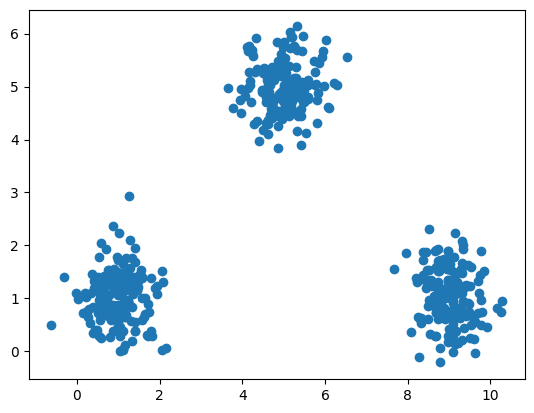

In [142]:
plt.scatter(x=data['Feature1'],y=data['Feature2'])

In [179]:
n_rows=len(data)
n_rows

498

In [57]:
dim=len(data.columns)
dim

2

In [61]:
np.array(data.sample(k))


array([[8.73012016, 0.61084764],
       [1.32384427, 1.76151493],
       [0.89593887, 0.75349953]])

In [182]:
np.random.seed(45)
def euclidean(point1,point2,dim):
    distance=np.sqrt(np.sum((point1-point2)**2))
    return distance
    

centroids=np.array(data.sample(k),dtype='float64')
def add_clusters(centroids):
    clusters = [[] for _ in range(k)]  # Start with an empty list for each cluster
    for i in range(n_rows):
        row = data.iloc[i].to_numpy()  # Convert row to a NumPy array
        dist = float('inf')
        clust = -1
        for j in range(len(centroids)):
            d = euclidean(centroids[j], row, dim)
            if d <= dist:
                dist = d
                clusterIndex = j
        clusters[clusterIndex].append(row)  # Append the row to the correct cluster

    # Convert each cluster to a NumPy array
    clusters = [np.array(cluster,dtype='float64') for cluster in clusters]
    
    return clusters

def update_centroids(clusters):
    new_centroids=np.copy(centroids)
    for i in range(len(clusters)):
        new_centroids[i] = np.average(np.array(clusters[i], dtype=float), axis=0)
    return new_centroids

new_centroids = np.array([[float('inf')] * dim for _ in range(k)], dtype='float64')
max_iter=1000
while not np.allclose(new_centroids, centroids) and max_iter>0:
    clusters=add_clusters(centroids)
    new_centroids=update_centroids(clusters)
    centroids=new_centroids
    max_iter-=1

print(centroids)


[[2.99794321 2.99614288]
 [9.02021444 1.76075352]
 [9.00214097 0.87556031]]


In [187]:
import numpy as np
import pandas as pd

class KMeans:
    def __init__(self, k, max_iter=5000, random_state=None):
        self.k = k  # Number of clusters
        self.max_iter = max_iter  # Maximum number of iterations
        self.centroids = None  # Centroids of clusters
        if random_state is not None:
            np.random.seed(random_state)  # Set seed for reproducibility

    def fit(self, data):
        # Randomly initialize centroids from the data
        self.centroids = np.array(data.sample(self.k), dtype='float64')
        self.n_rows, self.dim = data.shape

        new_centroids = np.array([[float('inf')] * dim for _ in range(self.k)], dtype='float64')
        
        while not np.allclose(new_centroids, self.centroids) and self.max_iter > 0:
            clusters = self._add_clusters(data)
            new_centroids = self._update_centroids(clusters)
            self.centroids = new_centroids
            self.max_iter -= 1

    def _euclidean(self, point1, point2):
        distance = np.sqrt(np.sum((point1 - point2) ** 2))
        return distance

    def _add_clusters(self, data):
        clusters = [[] for _ in range(self.k)]  # Start with an empty list for each cluster
        
        for i in range(n_rows):
            row_point = data.iloc[i].to_numpy()  # Convert row to a NumPy array
            distance_from_closest_centroid = float('inf')
            cluster_index = -1
            
            for j in range(len(self.centroids)):
                current_dist = self._euclidean(self.centroids[j], row_point)
                if current_dist<= distance_from_closest_centroid:
                    distance_from_closest_centroid = current_dist
                    cluster_index = j
            clusters[cluster_index].append(row)  # Append the row to the correct cluster
        
        # Convert each cluster to a NumPy array
        return [np.array(cluster, dtype='float64') for cluster in clusters]

    def _update_centroids(self, clusters):
        new_centroids = np.copy(self.centroids)
        for i in range(len(clusters)):
            new_centroids[i] = np.average(np.array(clusters[i], dtype=float), axis=0)
        return new_centroids

    def get_centroids(self):
        return self.centroids

# Example usage:
# Assuming `data` is a DataFrame containing your dataset
# data = pd.DataFrame(...)  # Your dataset
k = 3  # Number of clusters
kmeans = KMeans(k=k, random_state=45)
kmeans.fit(data)  # Fit the model to the data

print("Final Centroids:")
print(kmeans.get_centroids())


Final Centroids:
[[2.99794321 2.99614288]
 [9.02021444 1.76075352]
 [9.00214097 0.87556031]]


In [190]:
import numpy as np
import pandas as pd

class KMeans:
    """
    A K-means clustering implementation.

    Attributes:
        k (int): The number of clusters.
        max_iter (int): The maximum number of iterations to run the algorithm.
        centroids (numpy.ndarray): The centroids of the clusters.
    """
    
    def __init__(self, k, max_iter=5000, random_state=None):
        """
        Initializes the KMeans instance with specified parameters.

        Args:
            k (int): The number of clusters.
            max_iter (int): The maximum number of iterations (default is 5000).
            random_state (int, optional): Seed for random number generation for reproducibility.
        """
        self.k = k  # Number of clusters
        self.max_iter = max_iter  # Maximum number of iterations
        self.centroids = None  # Centroids of clusters
        if random_state is not None:
            np.random.seed(random_state)  # Set seed for reproducibility

    def fit(self, data):
        """
        Fits the KMeans model to the data.

        Args:
            data (pandas.DataFrame): The input data for clustering.
        """
        #Dropping the missing values
        data.dropna()
        # Randomly initialize centroids from the data
        
        
        self.centroids = np.array(data.sample(self.k), dtype='float64')
        self.n_rows, self.dim = data.shape

        # Initialize new_centroids to a large value for comparison
        new_centroids = np.array([[float('inf')] * self.dim for _ in range(self.k)], dtype='float64')
        
        # Iterate until convergence or maximum iterations
        while not np.allclose(new_centroids, self.centroids) and self.max_iter > 0:
            clusters = self._add_clusters(data)  # Assign clusters
            new_centroids = self._update_centroids(clusters)  # Update centroids
            self.centroids = new_centroids  # Update centroids for next iteration
            self.max_iter -= 1  # Decrease the iteration count

    def _euclidean(self, point1, point2):
        """
        Calculates the Euclidean distance between two points.

        Args:
            point1 (numpy.ndarray): The first point.
            point2 (numpy.ndarray): The second point.

        Returns:
            float: The Euclidean distance between the two points.
        """
        distance = np.sqrt(np.sum((point1 - point2) ** 2))
        return distance

    def _add_clusters(self, data):
        """
        Assigns data points to the nearest centroid.

        Args:
            data (pandas.DataFrame): The input data for clustering.

        Returns:
            list: A list of clusters, where each cluster is a numpy array of points.
        """
        clusters = [[] for _ in range(self.k)]  # Start with an empty list for each cluster
        
        for i in range(self.n_rows):
            row_point = data.iloc[i].to_numpy()  # Convert row to a NumPy array
            distance_from_closest_centroid = float('inf')
            cluster_index = -1
            
            for j in range(len(self.centroids)):
                current_dist = self._euclidean(self.centroids[j], row_point)  # Calculate distance to centroid
                if current_dist <= distance_from_closest_centroid:
                    distance_from_closest_centroid = current_dist
                    cluster_index = j  # Update the closest cluster index
            
            clusters[cluster_index].append(row_point)  # Append the row to the correct cluster
        
        # Convert each cluster to a NumPy array
        return [np.array(cluster, dtype='float64') for cluster in clusters]

    def _update_centroids(self, clusters):
        """
        Updates the centroids of the clusters based on the current clusters.

        Args:
            clusters (list): The current clusters.

        Returns:
            numpy.ndarray: The updated centroids.
        """
        new_centroids = np.copy(self.centroids)
        for i in range(len(clusters)):
            if len(clusters[i]) > 0:  # Check to avoid empty clusters
                new_centroids[i] = np.average(np.array(clusters[i], dtype=float), axis=0)
        return new_centroids

    def get_centroids(self):
        """
        Returns the final centroids after fitting.

        Returns:
            numpy.ndarray: The centroids of the clusters.
        """
        return self.centroids

# Example usage:
# Assuming `data` is a DataFrame containing your dataset
# data = pd.DataFrame(...)  # Your dataset
k = 3  # Number of clusters
kmeans = KMeans(k=k, random_state=45)
kmeans.fit(data)  # Fit the model to the data

print("Final Centroids:")
print(kmeans.get_centroids())


Final Centroids:
[[2.99794321 2.99614288]
 [9.02021444 1.76075352]
 [9.00214097 0.87556031]]
